In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.patches as mpatches
import numpy as np

randx = np.random.rand(100,1)
randy = np.random.rand(100,1)

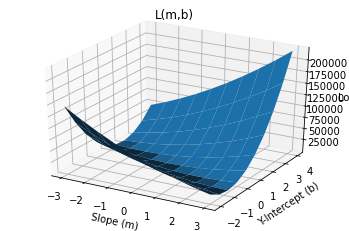

In [81]:
def calcLoss(mi, bi):
    return sum(mi*randx + bi - randy)[0] **2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ms = np.linspace(-3.0, 3.0, 10)
bs = np.linspace(-2.0, 4.0, 10)
M, B = np.meshgrid(ms, bs)
zs = np.array([calcLoss(x,y) for x,y in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z)

plt.title('L(m,b)')
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Y-Intercept (b)')
ax.set_zlabel('Loss')

plt.show()

m = 0.05713334288874167
b = 0.5210985041885806


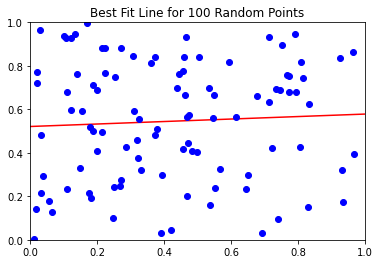

In [82]:
m = np.random.random(1)[0]
m *= -1 if np.random.random(1)[0] < 0.5 else 1
b = np.random.random(1)[0]
alpha = 0.001
threshold = 0.01
iteration = 0
i = [0]
loss = [sum(m*randx + b - randy)[0] **2]
mlist = [m]
blist = [b]

while True:
    deriv_m = sum(2*randx * (m*randx + b - randy))[0]
    deriv_b = sum(2 * (m*randx + b - randy))[0]
    if abs(deriv_m) < threshold and abs(deriv_b) < threshold:
        break
    m -= alpha*deriv_m
    b -= alpha*deriv_b
    iteration += 1
    i.append(iteration)
    mlist.append(m)
    blist.append(b)
    loss.append(sum(m*randx + b - randy)[0] **2)    

print("m =", m)
print("b =", b)
x = np.linspace(0,1,100)
y = m*x+b

plt.title('Best Fit Line for 100 Random Points')
plt.plot(x, y, '-r')
plt.plot(randx, randy, 'bo')
plt.axis([0, 1, 0, 1])
plt.show()

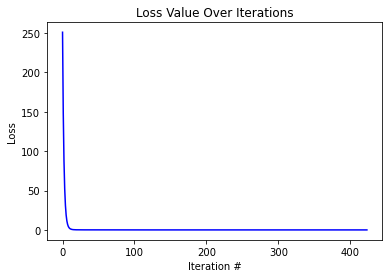

In [83]:
plt.plot(i, loss, 'b-')
plt.xlabel('Iteration #')
plt.ylabel('Loss')
plt.title('Loss Value Over Iterations')
plt.show()

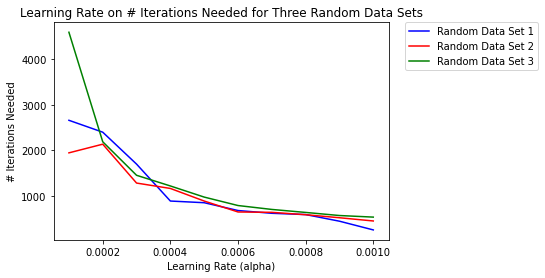

In [84]:
colors = ['b-', 'r-', 'g-']

for n in range(3):
    randx = np.random.rand(100,1)
    randy = np.random.rand(100,1)
    m = np.random.random(1)[0]
    m *= -1 if np.random.random(1)[0] < 0.5 else 1
    b = np.random.random(1)[0]
    alpha = 0
    threshold = 0.01
    alist = []
    itslist = []

    for i in range(10):
        randy = np.random.rand(100,1)
        m = np.random.random(1)[0]
        m *= -1 if np.random.random(1)[0] < 0.5 else 1
        b = np.random.random(1)[0]
        alpha += 0.0001
        iterations = 0
        while True:
            deriv_m = sum(2*randx * (m*randx + b - randy))[0]
            deriv_b = sum(2 * (m*randx + b - randy))[0]
            if abs(deriv_m) < threshold and abs(deriv_b) < threshold:
                break
            m -= alpha*deriv_m
            b -= alpha*deriv_b
            iterations += 1
        alist.append(alpha)
        itslist.append(iterations)

    plt.plot(alist, itslist, colors[n], label='Random Data Set '+str(n+1))

plt.title('Learning Rate on # Iterations Needed for Three Random Data Sets')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('# Iterations Needed')
plt.show()